# Project : Sentiment Analysis "IMDB Movie Reviews" with Machine Learning

#  Objective :

### Create a sentiment analysis template for IMDB movie reviews using the SVM algorithm
Determine if a movie review is positive or negative

# Sentiment Analysis

Sentiment analysis is essentially about judging the feeling behind a piece of writing. The process involves taking a piece of text, whether it's a sentence or an entire article, and analyzing the emotion that the author is expressing. At the most basic level, a sentiment analysis tool will classify pieces of text as positive, negative, or neutral.

Most simple sentiment analysis tools won't struggle to tell you that the first tweet is positive and the second negative. However, human expression is rarely that simple. When we speak, we convey a wide range of emotions that sometimes require context to be fully understood. All of this can happen in a single sentence.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
# tokenization basically refers to splitting up a larger body of text into smaller lines, words
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

In [2]:
# remove HTML tags
from bs4 import BeautifulSoup
#remove special characters
import re

In [3]:
# put the words to their word stem, base or root form—generally a written word form.
from nltk.stem.porter import PorterStemmer

# Import dataset

In [4]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Summary of the dataset

In [5]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Text Normalization

In [6]:
#Tokenization of text
#converting document in the form of terms
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

### Removing HTML tags and noise text

In [7]:
#Removing the html strips
#Beautiful Soup is a Python library for parsing HTML and XML documents
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Removing special characters

In [8]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

### Text stemming

In [9]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [10]:
imdb_data.head(10)

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,A wonder littl product the film techniqu is ve...,positive
2,I thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive
5,probabl my alltim favorit movi a stori of self...,positive
6,I sure would like to see a resurrect of a up d...,positive
7,thi show wa an amaz fresh innov idea in the 70...,negative
8,encourag by the posit comment about thi film o...,negative
9,If you like origin gut wrench laughter you wil...,positive


### Removing stopwords

In [11]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

{'how', 'has', 'while', 'other', 'those', 'through', 'by', 'did', 'doing', "you're", 'than', 'all', 'its', 'of', 'isn', "you've", 'a', 'after', 'during', 'her', 'too', "that'll", 'own', 'having', 'more', 'then', 'am', 'or', 'under', "wasn't", "needn't", 'haven', 'in', 'for', 'each', 'shouldn', "didn't", 'below', 'your', 'yours', 'itself', 'between', "mightn't", 'is', 'which', 'herself', 'and', 'at', 'some', 'him', 'theirs', 'any', 'his', 'this', 'be', "don't", 'doesn', 'mightn', "haven't", 'i', 'hers', 'both', 'he', 'himself', 'had', 'aren', "shouldn't", 'hasn', 'needn', "wouldn't", 'where', 'before', 've', 'ain', 'these', "weren't", 'wouldn', 'been', 'above', 'to', 'there', 'the', "should've", 'yourself', 'being', 'who', 'will', 'can', 'don', 'from', 'about', 'should', 'o', 'she', "hasn't", 'up', 'myself', 'we', "you'd", 'such', 'over', 'their', 'they', 'them', 'if', 'have', 'ourselves', 'but', 'an', "doesn't", 'again', 'that', 'm', 'until', 'are', 'my', 'yourselves', 'further', 'so',

In [12]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

In [13]:
imdb_data.head(10)

,review,sentiment
0,one review ha mention watch 1 Oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,thi show wa amaz fresh innov idea 70 first air...,negative
8,encourag posit comment thi film wa look forwar...,negative
9,like origin gut wrench laughter like thi movi ...,positive


# remove synonyms

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\info\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from nltk.corpus import wordnet 

In [16]:
# Exemple
# definir les termes synonymes
for i in imdb_data.review :
    text = i.split(' ')
    print(text)
    # fusionné les termes en un seule terme
    for j in text :
        for syn in wordnet.synsets(j):
            for l in syn.lemmas():
                for k in text:
                    if k == l.name():
                        text[text.index(k)]=j
    break
print(text)

['one', 'review', 'ha', 'mention', 'watch', '1', 'Oz', 'episod', 'youll', 'hook', 'right', 'thi', 'exactli', 'happen', 'meth', 'first', 'thing', 'struck', 'Oz', 'wa', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'GO', 'trust', 'thi', 'show', 'faint', 'heart', 'timid', 'thi', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'hardcor', 'classic', 'use', 'wordit', 'call', 'OZ', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'Em', 'citi', 'home', 'manyaryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'wouldnt', 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'ch

In [ ]:
def remove_syn(text):
    text = text.split(' ')
    for j in text :
        for syn in wordnet.synsets(j):
            for l in syn.lemmas():
                for k in text:
                    if k == l.name():
                        text[text.index(k)]=j
    text_ = ' '.join(text)
    return text_ 
imdb_data['review']=imdb_data['review'].apply(remove_syn)

In [20]:
imdb_data.head(10)

,Unnamed: 0,review,sentiment
0,0,one review ha mention saw one Oz episod youll ...,positive
1,1,wonder littl product film techniqu veri unassu...,positive
2,2,thought thi wa wonder way spend time hot summe...,positive
3,3,basic famili littl boy jake think zombi hi clo...,negative
4,4,petter mattei love time money visual stun take...,positive
5,5,probabl alltim favorit movi stori selfless sac...,positive
6,6,sure would like see resurrect see seahunt seri...,positive
7,7,thi show wa amaz fresh innov idea 70 first air...,negative
8,8,encourag posit comment thi film wa seen forwar...,negative
9,9,like origin gut wrench laughter like thi movi ...,positive


# Spliting the training dataset

In [17]:
#Données d'entrainement
norm_train_reviews=imdb_data.review[:8000]
train_sentiments=imdb_data.sentiment[:8000]
#Données de test
norm_test_reviews=imdb_data.review[8000:]
test_sentiments=imdb_data.sentiment[8000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

# SVM : Support Vector Machines

# 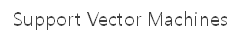

The basic principle of SVM is to reduce the problem of discrimination to the linear problem of finding an optimal hyperplane. Two ideas or tips can achieve this goal:

=> The first consists in defining the hyperplane as the solution of an optimization problem under constraints whose objective function is expressed only using scalar products between vectors and in which the number of “active” constraints or support vectors controls the complexity of the model.

=> The transition to the search for nonlinear separating surfaces is obtained by the introduction of a kernel function (kernel) in the scalar product implicitly inducing a nonlinear transformation of the data towards an intermediate space (feature space) of greater dimension . Hence the commonly encountered name of kernel machine or kernel machine. On the theoretical level, the kernel function defines a Hilbertian space, said to be self-reproducing and isometric by the nonlinear transformation of the initial space and in which the linear problem is solved.

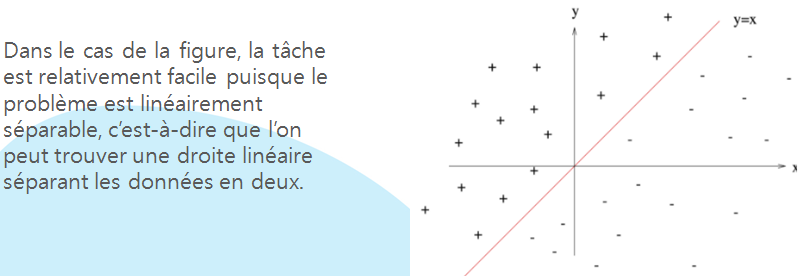

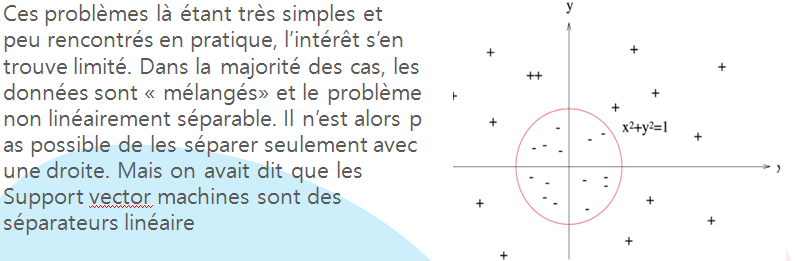

## convert text documents to numerical vectors

Two methodes :
##### ==>  Bags of words

A document is therefore represented by a vector of the same size as the dictionary, whose component i indicates the number of occurrences of the i-th word of the dictionary in the document.

##### ==>   Term Frequency-Inverse Document Frequency

## 1) Bags of words model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (8000, 1496689)
BOW_cv_test: (2000, 1496689)


## Term Frequency-Inverse Document Frequency model (TFIDF)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (8000, 1496689)
Tfidf_test: (2000, 1496689)


## Labeling the sentiment text

In [23]:
from sklearn.preprocessing import LabelBinarizer

In [53]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
sentiment_data=sentiment_data.ravel()
print(sentiment_data.shape)
#Spliting the sentiment data
train_sentiments=sentiment_data[:8000]
test_sentiments=sentiment_data[8000:]

(10000,)


## Modéle SVM

In [54]:
from sklearn.svm import SVC

### Modéle svm on utilisant Bag of word model

In [55]:
SvmClf = SVC(kernel='linear',C=1)

In [56]:
SvmClf.fit(cv_train_reviews,train_sentiments)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
svm_bow_predict=SvmClf.predict(cv_test_reviews)

#### Accuracy of the model

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

svm_bow_score : 0.6095


## Model svm on using TFIDF Model

In [60]:
#fitting the svm for tfidf features
svm_tfidf=SvmClf.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [61]:
svm_tfidf_predict=SvmClf.predict(cv_test_reviews)

In [62]:
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_bow_score :",svm_tfidf_score)

svm_bow_score : 0.7015


# Cross validation

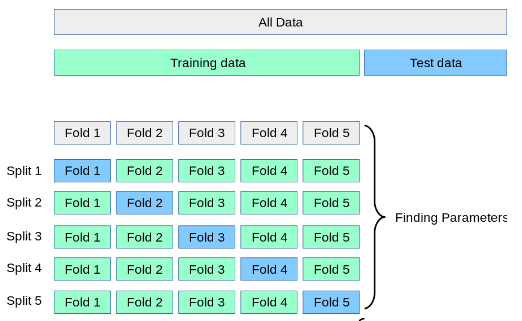

In [63]:
from sklearn.model_selection import cross_val_score

## Bag of word model

In [64]:
norm_reviews_bow = imdb_data.review[:]
cv_train_reviews_=cv.fit_transform(norm_reviews_bow)

In [65]:
scores = cross_val_score(SvmClf, cv_train_reviews_ , sentiment_data , cv=5)
print(scores)

[0.49725137 0.49725137 0.497      0.49724862 0.49724862]


##  TFIDF model

In [39]:
reviews_TFIDF = imdb_data.review[:]
tf_train_reviews_ = tv.fit_transform(reviews_TFIDF)

In [41]:
scores = cross_val_score(SvmClf, tf_train_reviews_ , sentiment_data , cv=5)
print(scores)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[0.50274863 0.50274863 0.503      0.50275138 0.50275138]


# Multinomial Naive Bayes for bag of words and tfidf features

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
#training the model
mnb=MultinomialNB()
#fitting the NB for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the NB for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [67]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [68]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7015
mnb_tfidf_score : 0.701


In [69]:
scores = cross_val_score(mnb, cv_train_reviews_ , sentiment_data , cv=5)
print(scores)

[0.49575212 0.49675162 0.4965     0.49524762 0.49474737]


In [70]:
scores = cross_val_score(mnb, tf_train_reviews_ , sentiment_data , cv=5)
print(scores)

[0.50274863 0.50274863 0.503      0.50275138 0.50525263]


In [52]:
print(sentiment_data.ravel())

[1 1 1 ... 0 0 1]
